## Lexical Approach

## Dataset

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 365 kB 4.4 MB/s 
     |████████████████████████████████| 120 kB 41.5 MB/s 
     |████████████████████████████████| 115 kB 44.5 MB/s 
     |████████████████████████████████| 212 kB 29.7 MB/s 
     |████████████████████████████████| 127 kB 44.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
from datasets import load_dataset

dataset_name = "amazon_reviews_multi"
marc_en = load_dataset(path=dataset_name, name="en")
train_ds = marc_en["train"]
train_ds

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/200000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5000 [00:00<?, ? examples/s]

Dataset amazon_reviews_multi downloaded and prepared to /root/.cache/huggingface/datasets/amazon_reviews_multi/en/1.0.0/724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Dataset({
    features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
    num_rows: 200000
})

In [ ]:
product_category = "home"
def filter_for_product(example, product_category=product_category):
    return example["product_category"] == product_category

In [ ]:
product_dataset = marc_en.filter(filter_for_product)

In [ ]:
product_dataset.set_format("pandas")
train_df = product_dataset["train"][:]
test_df = product_dataset["test"][:]

### Load Relevant Dependencies

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import string

lemmatizer=WordNetLemmatizer()
STOPWORDS = set(stopwords.words('english'))

import pandas as pd
import pprint
pp = pprint.PrettyPrinter()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Apply Pre-processing steps

In [ ]:
# Pre-process words per document
# Stopwords and punctuation Removal
# Lemmatized word representation and lowercasing

def word_preprocessor(word:str):
  """Returns a preprocessed word token"""

  if word not in STOPWORDS: # Stop Words Removal
    if word not in string.punctuation: # Punctuation Removal
      lemma = lemmatizer.lemmatize(word) # Lemmatization
      lemma = lemma.replace(',','').replace('.','') # Punctuation removal
      token = lemma.lower() # Lower Case
      return token

In [ ]:
%%time
# Preprocess training data 
processed_list = list()

for index, row in train_df.iterrows():
  sentence_list = []
  for word in row['review_body'].split(" "): # Tokenization
    token = word_preprocessor(word)
    if token:
      sentence_list.append(token)
  processed_list.append(sentence_list)
train_df['review_body_prep'] = processed_list

CPU times: user 3.1 s, sys: 43.4 ms, total: 3.14 s
Wall time: 3.16 s


In [ ]:
%%time
# Preprocess testing data
'''Important!!!'''
# Pre-processing steps for Testing data should be same as Training data 

processed_list = list()

for index, row in test_df.iterrows():
  sentence_list = []
  for word in row['review_body'].split(" "):
    token = word_preprocessor(word)
    if token:
      sentence_list.append(token)
  processed_list.append(sentence_list)
test_df['review_body_prep']=processed_list

CPU times: user 83 ms, sys: 1.01 ms, total: 84 ms
Wall time: 87.8 ms


### Lexical Approach will require a DICTIONARY to be created

In [ ]:
# Lexical Approach

%%time
# Create individual glossaries that contain only information that has a similar sentiment score.

star1_glossary_dict = dict()
star2_glossary_dict = dict()
star3_glossary_dict = dict()
star4_glossary_dict = dict()
star5_glossary_dict = dict()

for index, row in train_df.iterrows():
  if row['stars']==1:
    for word in row['review_body_prep']:
      if star1_glossary_dict.get(word,'None')=='None':
        star1_glossary_dict[word]=1
      else:
        star1_glossary_dict[word]+=1
  elif row['stars']==2:
    for word in row['review_body_prep']:
      if star2_glossary_dict.get(word,'None')=='None':
        star2_glossary_dict[word]=1
      else:
        star2_glossary_dict[word]+=1 
  elif row['stars']==3:
    for word in row['review_body_prep']:
      if star3_glossary_dict.get(word,'None')=='None':
        star3_glossary_dict[word]=1
      else:
        star3_glossary_dict[word]+=1
  elif row['stars']==4:
    for word in row['review_body_prep']:
      if star4_glossary_dict.get(word,'None')=='None':
        star4_glossary_dict[word]=1
      else:
        star4_glossary_dict[word]+=1 
  elif row['stars']==5:
    for word in row['review_body_prep']:
      if star5_glossary_dict.get(word,'None')=='None':
        star5_glossary_dict[word]=1
      else:
        star5_glossary_dict[word]+=1

star1_glossary_dict = pd.DataFrame.from_dict(star1_glossary_dict,orient='index',columns=['count']).sort_values('count',ascending=False)
star2_glossary_dict = pd.DataFrame.from_dict(star2_glossary_dict,orient='index',columns=['count']).sort_values('count',ascending=False)
star3_glossary_dict = pd.DataFrame.from_dict(star3_glossary_dict,orient='index',columns=['count']).sort_values('count',ascending=False)
star4_glossary_dict = pd.DataFrame.from_dict(star4_glossary_dict,orient='index',columns=['count']).sort_values('count',ascending=False)
star5_glossary_dict = pd.DataFrame.from_dict(star5_glossary_dict,orient='index',columns=['count']).sort_values('count',ascending=False)

CPU times: user 1.29 s, sys: 3.39 ms, total: 1.29 s
Wall time: 1.3 s


          count
i          3510
it          899
the         733
one         600
product     570
this        526
like        460
would       427
not         368
received    357
time        357
get         339
even        328
use         314
item        311
money       303
never       297
return      292
work        275
back        269
         count
i         3121
great      939
it         830
love       769
the        565
this       526
good       488
like       451
well       432
easy       409
use        399
quality    387
nice       386
product    363
one        360
perfect    359
very       334
look       331
really     314
they       308


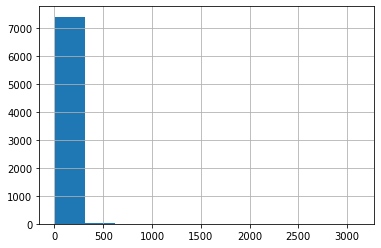

In [ ]:
# Inspect the results

pp.pprint(star1_glossary_dict.head(20))
pp.pprint(star5_glossary_dict.head(20))

star5_glossary_dict['count'].hist()

### Hyperparameters

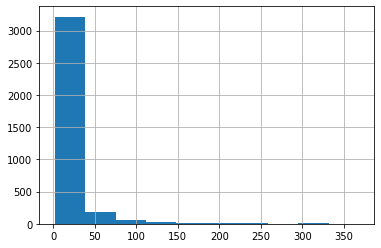

In [ ]:
# Star 1

max_threshold = star1_glossary_dict['count'].quantile(0.999)
min_threshold = star1_glossary_dict['count'].quantile(0.001)
star1_slice_df = star1_glossary_dict[(star1_glossary_dict['count']<max_threshold)&(star1_glossary_dict['count']>min_threshold)]
star1_slice_df['count'].hist()

In [ ]:
star1_slice_df[(star1_slice_df['count'] < max_threshold)&(star1_slice_df['count'] > min_threshold)]

,count
not,368
received,357
time,357
get,339
even,328
...,...
birch,2
freezing,2
on/off,2
jim,2


In [ ]:
# Star 2

max_threshold = star2_glossary_dict['count'].quantile(0.999)
min_threshold = star2_glossary_dict['count'].quantile(0.001)
star2_slice_df = star2_glossary_dict[(star2_glossary_dict['count']<max_threshold)&(star2_glossary_dict['count']>min_threshold)]

star2_slice_df[(star2_slice_df['count'] < max_threshold)&(star2_slice_df['count'] > min_threshold)]

,count
this,390
use,381
work,350
good,345
time,328
...,...
2016,2
exposed,2
overseas,2
cheesy,2


In [ ]:
# Star 3

max_threshold = star3_glossary_dict['count'].quantile(0.999)
min_threshold = star3_glossary_dict['count'].quantile(0.001)
star3_slice_df = star3_glossary_dict[(star3_glossary_dict['count']<max_threshold)&(star3_glossary_dict['count']>min_threshold)]

star3_slice_df[(star3_slice_df['count'] < max_threshold)&(star3_slice_df['count'] > min_threshold)]

,count
get,408
work,407
nice,400
great,392
well,371
...,...
generous,2
tunisian,2
shroom,2
doubled,2


In [ ]:
# Star 4

max_threshold = star4_glossary_dict['count'].quantile(0.999)
min_threshold = star4_glossary_dict['count'].quantile(0.001)
star4_slice_df = star4_glossary_dict[(star4_glossary_dict['count']<max_threshold)&(star4_glossary_dict['count']>min_threshold)]

star4_slice_df[(star4_slice_df['count'] < max_threshold)&(star4_slice_df['count'] > min_threshold)]

,count
little,508
well,493
nice,482
use,430
this,408
...,...
solve,2
reliable,2
outlast,2
blankets,2


In [ ]:
# Star 5

max_threshold = star5_glossary_dict['count'].quantile(0.999)
min_threshold = star5_glossary_dict['count'].quantile(0.001)
star5_slice_df = star5_glossary_dict[(star5_glossary_dict['count']<max_threshold)&(star5_glossary_dict['count']>min_threshold)]

star5_slice_df[(star5_slice_df['count'] < max_threshold)&(star5_slice_df['count'] > min_threshold)]

,count
well,432
easy,409
use,399
quality,387
nice,386
...,...
estimated,2
gun,2
custom,2
destroyed,2


### Scorer Function

In [ ]:
def scorer(doc:list, star1_score_df:pd.DataFrame=star1_slice_df, star2_score_df:pd.DataFrame=star2_slice_df,
           star3_score_df:pd.DataFrame=star3_slice_df, star4_score_df:pd.DataFrame=star4_slice_df,
           star5_score_df:pd.DataFrame=star5_slice_df):
  """convert a bag of words to a sentiment score"""
  
  scoring_dict = {}
  star1 = 0
  star2 = 0
  star3 = 0
  star4 = 0
  star5 = 0
  for token in doc:
    scores = []
    try:
      # Step 1a: Do I find a token in the star1 glossary?
      # Step 2b: I take the raw count as my individual token score
      star1_score = star1_score_df['count'][star1_score_df.index==token].values[0]
      scores.append(star1_score)
    except IndexError :
      star1_score = 0
      scores.append(star1_score)
    try:
      # Step 1b: Do I find a token in the star2 glossary?
      # Step 2b: I take the raw count as my individual token score
      star2_score = star2_score_df['count'][star2_score_df.index==token].values[0]
      scores.append(star2_score)
    except IndexError :
      star2_score = 0
      scores.append(star2_score)
    try:
      # Step 1b: Do I find a token in the star3 glossary?
      # Step 2b: I take the raw count as my individual token score
      star3_score = star3_score_df['count'][star3_score_df.index==token].values[0]
      scores.append(star3_score)
    except IndexError :
      star3_score = 0
      scores.append(star3_score)
    try:
      # Step 1b: Do I find a token in the star4 glossary?
      # Step 2b: I take the raw count as my individual token score
      star4_score = star4_score_df['count'][star4_score_df.index==token].values[0]
      scores.append(star4_score)
    except IndexError :
      star4_score = 0
      scores.append(star4_score)
    try:
      # Step 1b: Do I find a token in the star5 glossary?
      # Step 2b: I take the raw count as my individual token score
      star5_score = star5_score_df['count'][star5_score_df.index==token].values[0]
      scores.append(star5_score)
    except IndexError :
      star5_score = 0
      scores.append(star5_score)

# 3. I choose a simple non-parametric approach to define the data generting process of the token label (ordinal variable)
    if star1_score == max(scores):
      star1 = star1 + 1
    
    if star2_score == max(scores):
      star2 = star2 + 1
    
    if star3_score == max(scores):
      star3 = star3 + 1
    
    if star4_score == max(scores):
      star4 = star4 + 1

    if star5_score == max(scores):
      star5 = star5 + 1
  
  scoring_dict['1'] = star1
  scoring_dict['2'] = star2
  scoring_dict['3'] = star3
  scoring_dict['4'] = star4
  scoring_dict['5'] = star5

  star_value = max(scoring_dict, key=scoring_dict.get)

  return star_value

### Testing of the Logic

In [ ]:
# Testing
for index,row in test_df.iterrows():
  test_df.loc[index, 'predicted'] = scorer(row['review_body_prep']) 
  print(f"{index} has a actual star: {row['stars']} and predicted star: {test_df.loc[index, 'predicted']}")

In [ ]:
test_df

### Evaluation of the Model

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_df["stars"], test_df["predicted"])

1.0295454545454545